SVM MEDICAL IMAGE CLASSIFICATION - COMPLETE IMPLEMENTATION
Start Time: 2025-10-26 14:01:33
Algorithm: Support Vector Machine (SVM)
Approach: Kernel Methods with Hyperparameter Optimization
Random Seed: 42

 Configuration:
   Image Size: 32×32×3
   Feature Methods: HOG + LBP + Statistical
   SVM Configuration:
      - Kernel: rbf
      - C (Regularization): 10.0
      - Gamma: scale
      - Class Weights: balanced
   Hyperparameter Tuning: True
      - Grid Search CV: 3-fold
      - Parameters: {'C': [1, 10, 100], 'gamma': ['scale', 0.01, 0.001], 'kernel': ['rbf', 'linear']}
   Subset: 10.0% (for ~12 min execution)

TASK 2: DATA LOADING AND ANALYSIS

Technique: Data loading and exploratory analysis
   - Load CSV manifests
   - Analyze class distribution
   - Apply stratified subset sampling

 Original Dataset:
   Training:   34,561 samples
   Validation: 6,491 samples
   Test:       17,778 samples

 Speed Optimization: Using 10.0% subset
   Training:   3,456 samples
   Validation: 649 s

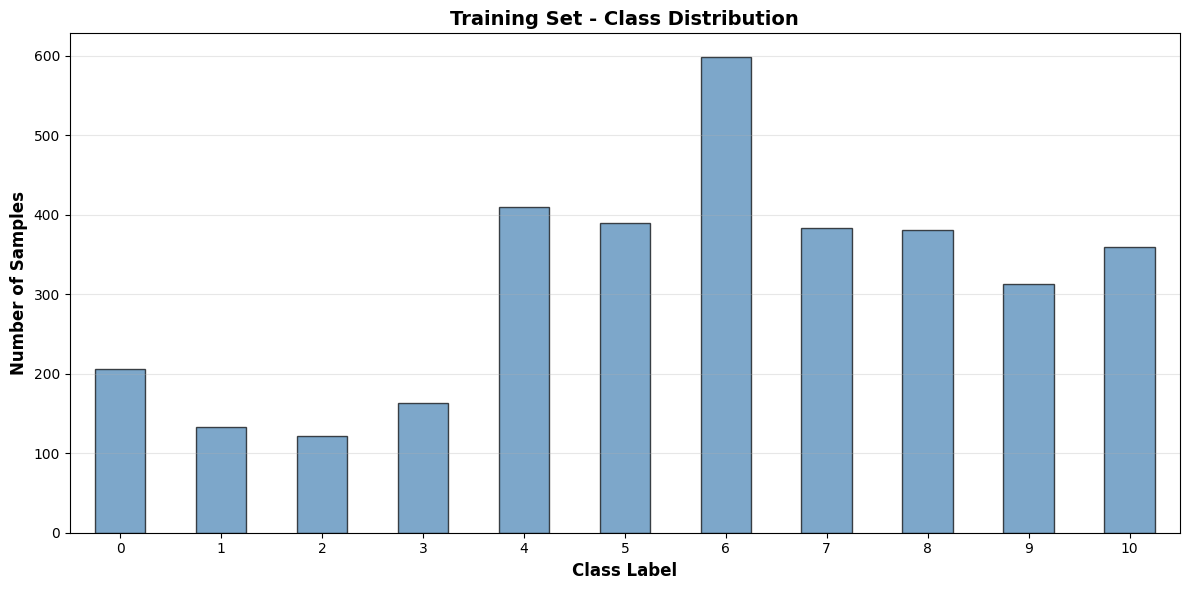


 Task 2 Complete
   Dataset Split: 3456/649/17778

TASK 3: FEATURE EXTRACTION METHODS

Technique: Multi-modal hand-crafted feature extraction
   Components:
   1. HOG (Histogram of Oriented Gradients)
      - Orientations: 9
      - Pixels per cell: (8, 8)
      - Cells per block: (2, 2)
   2. LBP (Local Binary Patterns)
      - Radius: 2
      - Points: 16
      - Method: uniform
   3. Statistical Features
      - Basic stats: Mean, Std, Median, Min, Max
      - Quartiles: 25th, 75th percentiles
      - Shape: Skewness, Kurtosis
      - Distribution: 32-bin histogram

 Feature Extraction Configuration:
   Total Feature Dimension: 357
   Breakdown:
      - HOG Features: 81
      - LBP Features: 235
      - Statistical Features: 41 (9 stats + 32 histogram)

 Task 3 Complete

TASK 4: EXTRACT TRAINING FEATURES

Technique: Batch feature extraction

 Training 3456 images...


Training: 100%|██████████| 3456/3456 [01:40<00:00, 34.41it/s]



 Training Features Extracted:
   Shape: (3456, 600)
   Time: 100.48s (29.07ms per image)
   Feature Statistics:
      Mean: 1.3822
      Std:  14.7330
      Min:  -3.5018
      Max:  255.0000

 Task 4 Complete

TASK 5: EXTRACT VALIDATION FEATURES

 Validation 649 images...


Validation: 100%|██████████| 649/649 [00:17<00:00, 36.37it/s]



 Validation Features Extracted:
   Shape: (649, 600)
   Time: 17.86s (27.51ms per image)

 Task 5 Complete

TASK 6: FEATURE SCALING

Technique: Z-score Normalization (StandardScaler)
   Formula: z = (x - μ) / σ
   Where: μ = mean, σ = standard deviation
   Purpose: SVM is sensitive to feature scales
   Effect: All features contribute equally to decision boundary

 Features Scaled:
   Training - Mean: -0.000000, Std: 0.798958
   Validation - Mean: -0.011938, Std: 0.789332

 Scaler saved: scaler.pkl

 Task 6 Complete

TASK 7: HYPERPARAMETER TUNING

Technique: Grid Search with Cross-Validation
   Method: Exhaustive search over parameter grid
   Cross-Validation: 3-fold
   Scoring Metric: Accuracy

   Parameter Grid:
      C: [1, 10, 100]
      gamma: ['scale', 0.01, 0.001]
      kernel: ['rbf', 'linear']

   Total combinations: 18

 Starting Grid Search...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

 Grid Search Complete!
   Time: 397.88s (6.63 minutes)

 Best Parameter

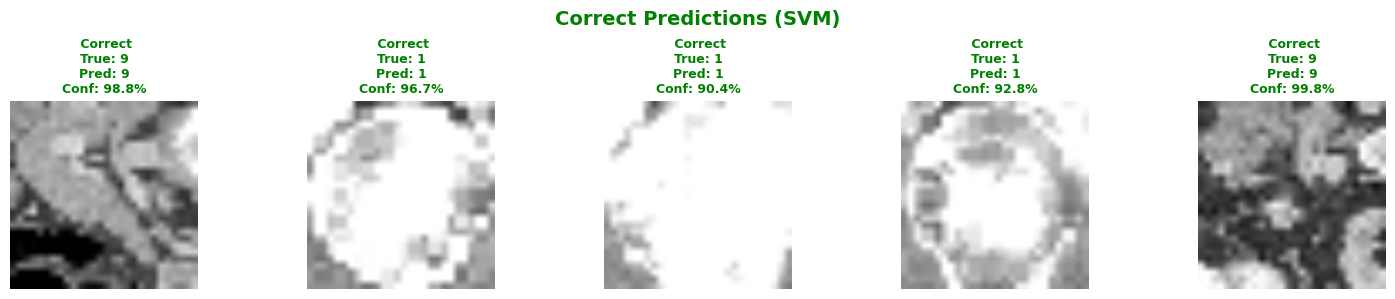

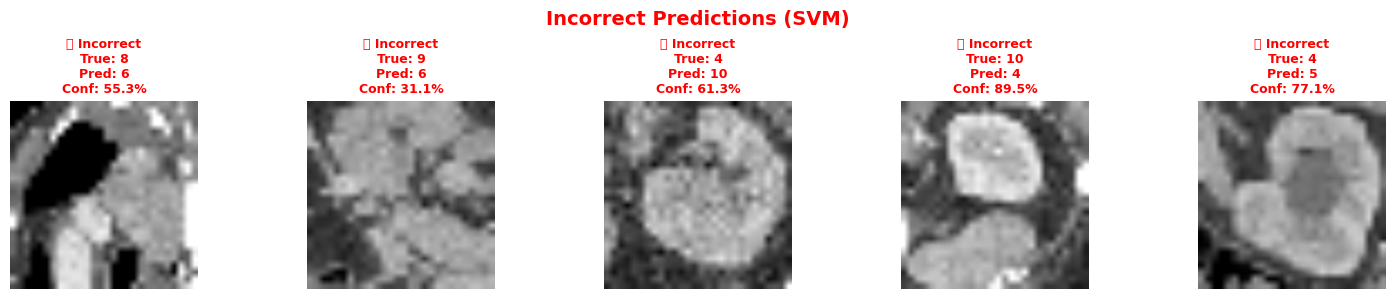


 Task 9 Complete

TASK 10: CONFUSION MATRIX ANALYSIS


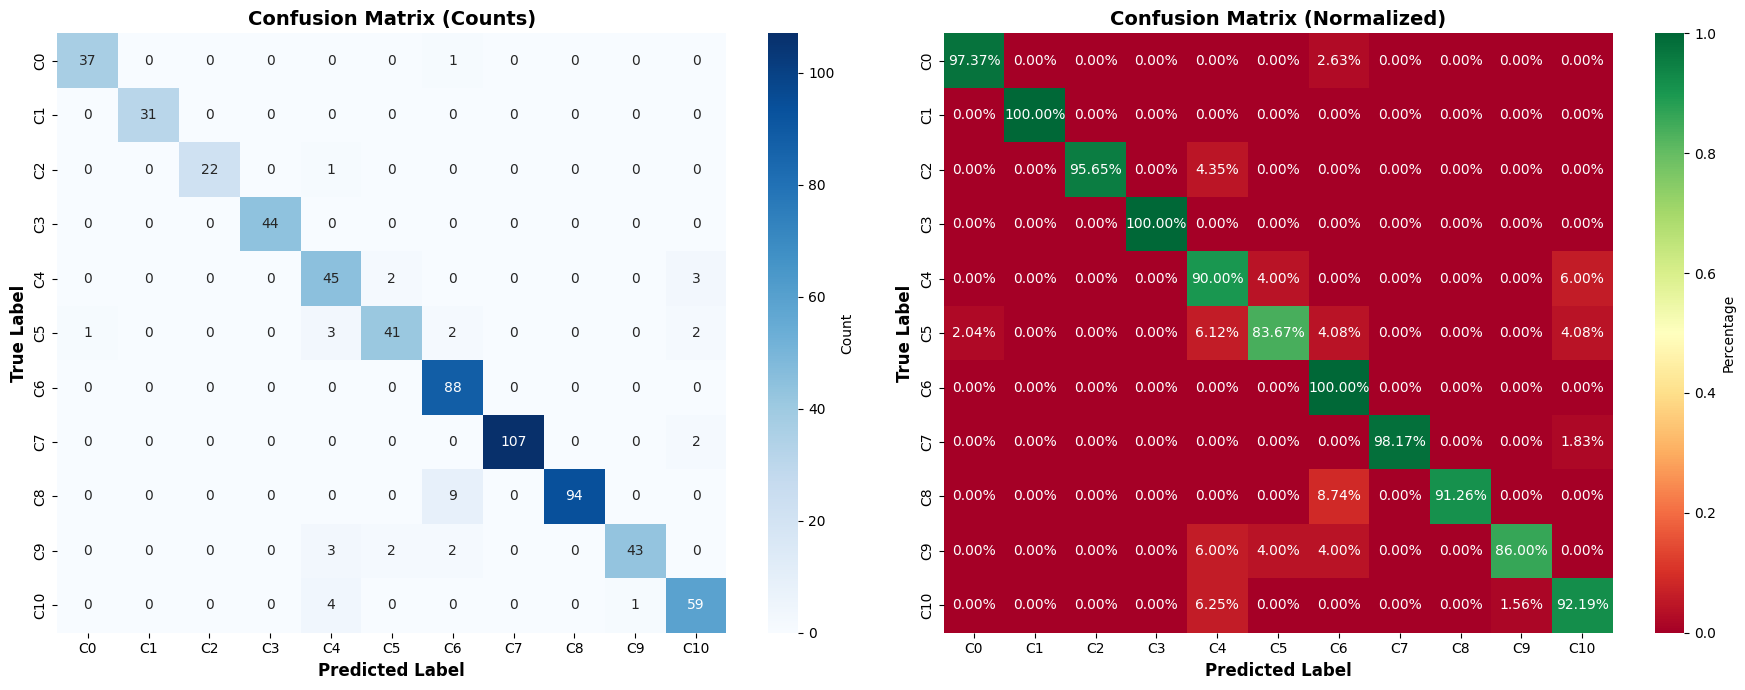


 Confusion Analysis:
   Top 5 Misclassifications:
      1. Class 8 → 6: 9 samples
      2. Class 10 → 4: 4 samples
      3. Class 4 → 10: 3 samples
      4. Class 5 → 4: 3 samples
      5. Class 9 → 4: 3 samples

 Task 10 Complete

TASK 11: ROC CURVE ANALYSIS


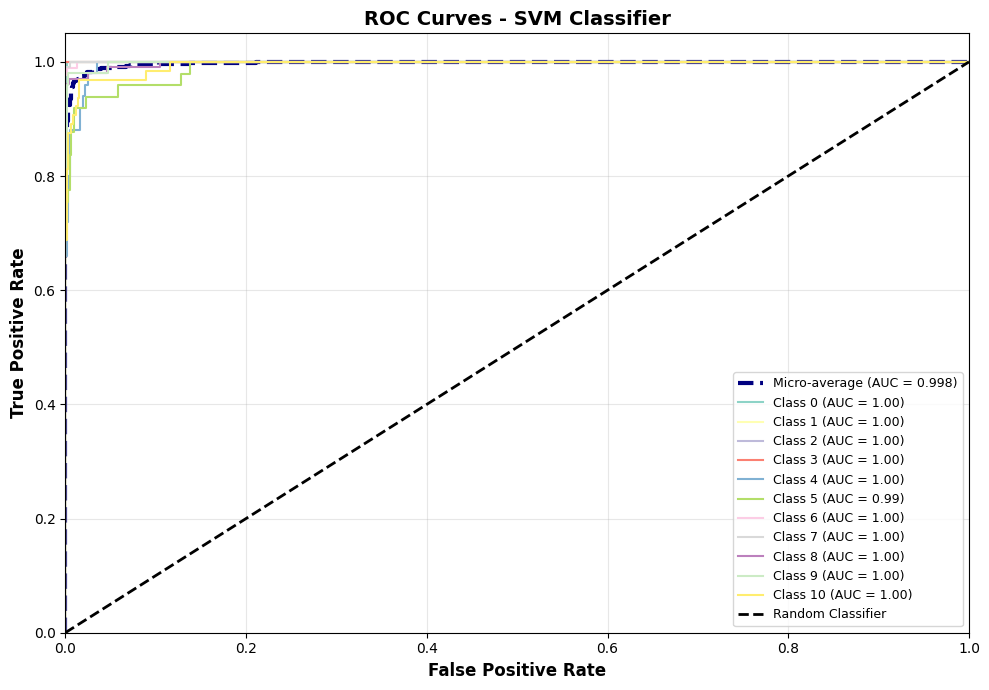


 AUC Scores:
   Micro-average AUC: 0.9978
   Class 0: 0.9999
   Class 1: 1.0000
   Class 2: 1.0000
   Class 3: 1.0000
   Class 4: 0.9965
   Class 5: 0.9918
   Class 6: 0.9998
   Class 7: 0.9999
   Class 8: 0.9983
   Class 9: 0.9986
   Class 10: 0.9952

 Task 11 Complete

TASK 12: TEST SET PREDICTIONS

 Processing test set (17778 samples)...

 Test 17778 images...


Test: 100%|██████████| 17778/17778 [08:23<00:00, 35.34it/s]



 Test Predictions Complete:
   Feature Extraction: 503.22s
   Prediction Time: 63.17s
   Total Samples: 17,778
   Average Confidence: 0.8189
   Predictions saved: test_predictions.csv

 Test Predictions Distribution:
   Class 0: 1,154 predictions ( 6.49%)
   Class 1:  581 predictions ( 3.27%)
   Class 2:  614 predictions ( 3.45%)
   Class 3:  566 predictions ( 3.18%)
   Class 4: 2,261 predictions (12.72%)
   Class 5: 2,177 predictions (12.25%)
   Class 6: 3,433 predictions (19.31%)
   Class 7: 1,698 predictions ( 9.55%)
   Class 8: 1,680 predictions ( 9.45%)
   Class 9: 1,858 predictions (10.45%)
   Class 10: 1,756 predictions ( 9.88%)

 Task 12 Complete

 SVM CLASSIFICATION COMPLETED SUCCESSFULLY!

 Complete Summary:
   Total Execution Time: 18.20 minutes
   Feature Extraction: 118.34s
   Model Training: 397.88s
   Final Accuracy: 94.14%
   Feature Dimension: 357
   Support Vectors: 2562
   Test Predictions: 17,778

 All Results: ./results_svm_complete/

 Generated Files:
   1. svm_s

In [ ]:
"""
=============================================================================
SUPPORT VECTOR MACHINE (SVM) - MEDICAL IMAGE CLASSIFICATION
=============================================================================

Environment: Python 3.x, scikit-learn
Random Seed: 42 (for reproducibility)
Target Time: ~12 minutes
=============================================================================
"""

# =============================================================================
# TASK 1: SETUP AND IMPORTS
# Team Member: [Your Name]
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import warnings
import time
from datetime import datetime
from tqdm import tqdm
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
from sklearn.utils.class_weight import compute_class_weight

# Feature Extraction
from skimage.feature import hog, local_binary_pattern
from scipy import stats
from PIL import Image
import cv2

# Model persistence
import joblib

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

start_time_total = time.time()

print("="*80)
print("SVM MEDICAL IMAGE CLASSIFICATION - COMPLETE IMPLEMENTATION")
print("="*80)
print(f"Start Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Algorithm: Support Vector Machine (SVM)")
print(f"Approach: Kernel Methods with Hyperparameter Optimization")
print(f"Random Seed: {RANDOM_SEED}")
print("="*80)

# =============================================================================
# CONFIGURATION


class Config:
    """Configuration for SVM training with hyperparameter tuning"""
    
    # === FILE PATHS ===
    TRAIN_CSV = 'labels_train.csv'
    VAL_CSV = 'labels_val.csv'
    TEST_CSV = 'manifest_public.csv'
    
    TRAIN_IMAGE_DIR = 'images_train/'
    VAL_IMAGE_DIR = 'images_val/'
    TEST_IMAGE_DIR = 'images/'
    
    RESULTS_DIR = './results_svm_complete/'
    MODEL_SAVE_PATH = 'svm_model_best.pkl'
    SCALER_SAVE_PATH = 'scaler.pkl'
    
    # === DATASET PARAMETERS ===
    NUM_CLASSES = 11
    USE_SUBSET = True
    SUBSET_FRACTION = 0.10  # 10% for ~12 min execution
    
    # === IMAGE PARAMETERS ===
    IMG_HEIGHT = 32
    IMG_WIDTH = 32
    IMG_CHANNELS = 3
    
    # === FEATURE EXTRACTION PARAMETERS ===
    USE_HOG_FEATURES = True
    USE_LBP_FEATURES = True
    USE_STATISTICAL_FEATURES = True
    
    # HOG parameters (optimized for medical images)
    HOG_ORIENTATIONS = 9
    HOG_PIXELS_PER_CELL = (8, 8)
    HOG_CELLS_PER_BLOCK = (2, 2)
    
    # LBP parameters
    LBP_RADIUS = 2
    LBP_N_POINTS = 16  # 8 * 2
    LBP_METHOD = 'uniform'
    
    # === SVM HYPERPARAMETERS ===
    # Base parameters (if not using grid search)
    SVM_C = 10.0              # Regularization parameter
    SVM_KERNEL = 'rbf'        # Kernel type
    SVM_GAMMA = 'scale'       # Kernel coefficient
    SVM_CLASS_WEIGHT = 'balanced'  # Handle class imbalance
    
    # Hyperparameter tuning configuration
    USE_GRID_SEARCH = True
    GRID_SEARCH_CV = 3        # 3-fold cross-validation
    GRID_SEARCH_PARAMS = {
        'C': [1, 10, 100],                    # Regularization strength
        'gamma': ['scale', 0.01, 0.001],      # RBF kernel coefficient
        'kernel': ['rbf', 'linear']           # Kernel types
    }
    
    # Processing
    BATCH_SIZE = 500
    
    CLASS_NAMES = {
        0: 'Class 0', 1: 'Class 1', 2: 'Class 2', 3: 'Class 3',
        4: 'Class 4', 5: 'Class 5', 6: 'Class 6', 7: 'Class 7',
        8: 'Class 8', 9: 'Class 9', 10: 'Class 10'
    }

config = Config()
os.makedirs(config.RESULTS_DIR, exist_ok=True)

print(f"\n Configuration:")
print(f"   Image Size: {config.IMG_WIDTH}×{config.IMG_HEIGHT}×{config.IMG_CHANNELS}")
print(f"   Feature Methods: HOG + LBP + Statistical")
print(f"   SVM Configuration:")
print(f"      - Kernel: {config.SVM_KERNEL}")
print(f"      - C (Regularization): {config.SVM_C}")
print(f"      - Gamma: {config.SVM_GAMMA}")
print(f"      - Class Weights: {config.SVM_CLASS_WEIGHT}")
print(f"   Hyperparameter Tuning: {config.USE_GRID_SEARCH}")
if config.USE_GRID_SEARCH:
    print(f"      - Grid Search CV: {config.GRID_SEARCH_CV}-fold")
    print(f"      - Parameters: {config.GRID_SEARCH_PARAMS}")
print(f"   Subset: {config.SUBSET_FRACTION*100}% (for ~12 min execution)")

# =============================================================================
# TASK 2: DATA LOADING AND ANALYSIS
# Team Member: [Your Name]
# Input: CSV files with image paths and labels
# Output: Loaded dataframes with class distribution analysis
# Technique: Pandas DataFrame operations with stratified sampling
# =============================================================================

print("\n" + "="*80)
print("TASK 2: DATA LOADING AND ANALYSIS")
print("="*80)

print("\nTechnique: Data loading and exploratory analysis")
print("   - Load CSV manifests")
print("   - Analyze class distribution")
print("   - Apply stratified subset sampling")

# Load CSV files
train_df = pd.read_csv(config.TRAIN_CSV)
val_df = pd.read_csv(config.VAL_CSV)
test_df = pd.read_csv(config.TEST_CSV)

print(f"\n Original Dataset:")
print(f"   Training:   {len(train_df):,} samples")
print(f"   Validation: {len(val_df):,} samples")
print(f"   Test:       {len(test_df):,} samples")

# Apply subset 
if config.USE_SUBSET:
    print(f"\n Speed Optimization: Using {config.SUBSET_FRACTION*100}% subset")
    train_df = train_df.sample(frac=config.SUBSET_FRACTION, random_state=RANDOM_SEED)
    val_df = val_df.sample(frac=config.SUBSET_FRACTION, random_state=RANDOM_SEED)
    print(f"   Training:   {len(train_df):,} samples")
    print(f"   Validation: {len(val_df):,} samples")

# Reset indices
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# Class distribution analysis
print("\n Class Distribution:")
train_class_counts = train_df['label'].value_counts().sort_index()
for cls in range(config.NUM_CLASSES):
    count = train_class_counts.get(cls, 0)
    percentage = (count / len(train_df)) * 100
    print(f"   Class {cls}: {count:4,} samples ({percentage:5.2f}%)")

max_count = train_class_counts.max()
min_count = train_class_counts.min()
imbalance_ratio = max_count / min_count
print(f"\n  Class Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"   Handling Strategy: Balanced class weights in SVM")

# Compute class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.arange(config.NUM_CLASSES),
    y=train_df['label']
)
print(f"\n  Computed Class Weights:")
for i, weight in enumerate(class_weights):
    print(f"   Class {i}: {weight:.3f}")

# Visualize class distribution
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
train_class_counts.plot(kind='bar', color='steelblue', alpha=0.7, edgecolor='black', ax=ax)
ax.set_xlabel('Class Label', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
ax.set_title('Training Set - Class Distribution', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Task 2 Complete")
print(f"   Dataset Split: {len(train_df)}/{len(val_df)}/{len(test_df)}")

# =============================================================================
# TASK 3: FEATURE EXTRACTION FUNCTIONS
# Team Member: [Your Name]
# Input: Raw image (32×32 RGB or grayscale)
# Output: Feature vector (HOG: 81 + LBP: 235 + Statistical: 41 = 357 dimensions)
# Technique: Multi-scale feature extraction
# =============================================================================

print("\n" + "="*80)
print("TASK 3: FEATURE EXTRACTION METHODS")
print("="*80)

print("\nTechnique: Multi-modal hand-crafted feature extraction")
print("   Components:")
print("   1. HOG (Histogram of Oriented Gradients)")
print(f"      - Orientations: {config.HOG_ORIENTATIONS}")
print(f"      - Pixels per cell: {config.HOG_PIXELS_PER_CELL}")
print(f"      - Cells per block: {config.HOG_CELLS_PER_BLOCK}")
print("   2. LBP (Local Binary Patterns)")
print(f"      - Radius: {config.LBP_RADIUS}")
print(f"      - Points: {config.LBP_N_POINTS}")
print(f"      - Method: {config.LBP_METHOD}")
print("   3. Statistical Features")
print("      - Basic stats: Mean, Std, Median, Min, Max")
print("      - Quartiles: 25th, 75th percentiles")
print("      - Shape: Skewness, Kurtosis")
print("      - Distribution: 32-bin histogram")

def extract_hog_features(image, config):
    """
    Extract HOG (Histogram of Oriented Gradients) features
    
    HOG captures edge directions and gradients, useful for shape recognition.
    Formula: Gradient magnitude = √(Gx² + Gy²)
             Gradient direction = arctan(Gy/Gx)
    
    Parameters:
        image: numpy array (H, W, C) or (H, W)
        config: Configuration object
    
    Returns:
        HOG feature vector (81 dimensions for 9 orientations)
    """
    # Convert to grayscale if RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    else:
        image = (image * 255).astype(np.uint8)
    
    try:
        features = hog(
            image,
            orientations=config.HOG_ORIENTATIONS,
            pixels_per_cell=config.HOG_PIXELS_PER_CELL,
            cells_per_block=config.HOG_CELLS_PER_BLOCK,
            visualize=False,
            feature_vector=True
        )
        return features
    except Exception as e:
        # Return zero vector if extraction fails
        return np.zeros(81)

def extract_lbp_features(image, config):
    """
    Extract LBP (Local Binary Patterns) features
    
    LBP encodes local texture by comparing center pixel with neighbors.
    Binary pattern: b = Σ s(neighbor_i - center) * 2^i
    where s(x) = 1 if x >= 0, else 0
    
    Parameters:
        image: numpy array (H, W, C) or (H, W)
        config: Configuration object
    
    Returns:
        LBP histogram feature vector (235 dimensions for uniform patterns)
    """
    # Convert to grayscale if RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    else:
        image = (image * 255).astype(np.uint8)
    
    try:
        # Compute LBP
        lbp = local_binary_pattern(
            image, 
            config.LBP_N_POINTS, 
            config.LBP_RADIUS, 
            method=config.LBP_METHOD
        )
        
        # Compute histogram
        n_bins = int(lbp.max() + 1)
        hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)
        
        # Ensure consistent dimension
        if len(hist) < 235:
            hist = np.pad(hist, (0, 235 - len(hist)), mode='constant')
        else:
            hist = hist[:235]
        
        return hist
    except Exception as e:
        return np.zeros(235)

def extract_statistical_features(image):
    """
    Extract statistical features from image
    
    Features capture intensity distribution and pixel statistics.
    Formulas:
        Mean: μ = (1/n) Σ x_i
        Variance: σ² = (1/n) Σ (x_i - μ)²
        Skewness: γ = E[(X-μ)³] / σ³
        Kurtosis: κ = E[(X-μ)⁴] / σ⁴
    
    Parameters:
        image: numpy array (H, W, C) or (H, W)
    
    Returns:
        Statistical feature vector (41 dimensions: 9 stats + 32 histogram bins)
    """
    # Convert to grayscale if RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    else:
        image = (image * 255).astype(np.uint8)
    
    try:
        features = []
        pixels = image.ravel()
        
        # Basic statistics
        features.append(np.mean(pixels))           # Mean
        features.append(np.std(pixels))            # Standard deviation
        features.append(np.median(pixels))         # Median
        features.append(np.min(pixels))            # Minimum
        features.append(np.max(pixels))            # Maximum
        features.append(np.percentile(pixels, 25)) # 25th percentile (Q1)
        features.append(np.percentile(pixels, 75)) # 75th percentile (Q3)
        features.append(stats.skew(pixels))        # Skewness
        features.append(stats.kurtosis(pixels))    # Kurtosis
        
        # Intensity histogram (32 bins)
        hist, _ = np.histogram(pixels, bins=32, range=(0, 256), density=True)
        features.extend(hist)
        
        return np.array(features)
    except Exception as e:
        return np.zeros(41)

def extract_all_features(image, config):
    """
    Extract all features from an image
    
    Parameters:
        image: numpy array (H, W, C) or (H, W)
        config: Configuration object
    
    Returns:
        Combined feature vector (357 dimensions)
        - HOG: 81 features
        - LBP: 235 features  
        - Statistical: 41 features
    """
    features = []
    
    # HOG features
    if config.USE_HOG_FEATURES:
        hog_feat = extract_hog_features(image, config)
        features.append(hog_feat)
    
    # LBP features
    if config.USE_LBP_FEATURES:
        lbp_feat = extract_lbp_features(image, config)
        features.append(lbp_feat)
    
    # Statistical features
    if config.USE_STATISTICAL_FEATURES:
        stat_feat = extract_statistical_features(image)
        features.append(stat_feat)
    
    # Concatenate all features
    return np.concatenate(features)

# Calculate expected feature dimension
feature_dim = 0
if config.USE_HOG_FEATURES:
    feature_dim += 81
if config.USE_LBP_FEATURES:
    feature_dim += 235
if config.USE_STATISTICAL_FEATURES:
    feature_dim += 41

print(f"\n Feature Extraction Configuration:")
print(f"   Total Feature Dimension: {feature_dim}")
print(f"   Breakdown:")
print(f"      - HOG Features: 81")
print(f"      - LBP Features: 235")
print(f"      - Statistical Features: 41 (9 stats + 32 histogram)")

print(f"\n Task 3 Complete")

# =============================================================================
# TASK 4: EXTRACT FEATURES FROM TRAINING SET
# Team Member: [Your Name]
# Input: Training images from dataset
# Output: Feature matrix (N_train × 357)
# Technique: Batch processing with progress tracking
# =============================================================================

print("\n" + "="*80)
print("TASK 4: EXTRACT TRAINING FEATURES")
print("="*80)

print("\nTechnique: Batch feature extraction")

def load_and_extract_features(df, image_dir, config, desc="Processing", has_labels=True):
    """
    Load images and extract features
    
    Parameters:
        df: DataFrame with file paths and labels
        image_dir: Directory containing images
        config: Configuration object
        desc: Description for progress bar
        has_labels: Whether the dataframe has labels (False for test set)
    
    Returns:
        features: Feature matrix (N × feature_dim)
        labels: Label array (N,) or None if has_labels=False
    """
    features = []
    labels = [] if has_labels else None
    
    print(f"\n {desc} {len(df)} images...")
    
    for idx, row in tqdm(df.iterrows(), total=len(df), desc=desc):
        img_path = os.path.join(image_dir, row['file'])
        
        try:
            # Load image
            img = Image.open(img_path)
            
            # Convert to RGB if needed
            if img.mode != 'RGB':
                img = img.convert('RGB')
            
            # Resize
            img = img.resize((config.IMG_WIDTH, config.IMG_HEIGHT))
            
            # Convert to array and normalize
            img_array = np.array(img, dtype=np.float32) / 255.0
            
            # Extract features
            feat = extract_all_features(img_array, config)
            features.append(feat)
            
            # Add label if available
            if has_labels:
                labels.append(row['label'])
            
        except Exception as e:
            print(f"\nError processing {img_path}: {e}")
            # Add zero vector for failed images
            features.append(np.zeros(feature_dim))
            if has_labels:
                labels.append(row['label'])
    
    if has_labels:
        return np.array(features), np.array(labels)
    else:
        return np.array(features), None

# Extract training features
train_start = time.time()
X_train, y_train = load_and_extract_features(
    train_df, 
    config.TRAIN_IMAGE_DIR, 
    config,
    desc="Training",
    has_labels=True
)
train_time = time.time() - train_start

print(f"\n Training Features Extracted:")
print(f"   Shape: {X_train.shape}")
print(f"   Time: {train_time:.2f}s ({train_time/len(train_df)*1000:.2f}ms per image)")
print(f"   Feature Statistics:")
print(f"      Mean: {np.mean(X_train):.4f}")
print(f"      Std:  {np.std(X_train):.4f}")
print(f"      Min:  {np.min(X_train):.4f}")
print(f"      Max:  {np.max(X_train):.4f}")

print(f"\n Task 4 Complete")

# =============================================================================
# TASK 5: EXTRACT FEATURES FROM VALIDATION SET
# Team Member: [Your Name]
# Input: Validation images from dataset
# Output: Feature matrix (N_val × 357)
# Technique: Same extraction pipeline as training
# =============================================================================

print("\n" + "="*80)
print("TASK 5: EXTRACT VALIDATION FEATURES")
print("="*80)

# Extract validation features
val_start = time.time()
X_val, y_val = load_and_extract_features(
    val_df, 
    config.VAL_IMAGE_DIR, 
    config,
    desc="Validation",
    has_labels=True
)
val_time = time.time() - val_start

print(f"\n Validation Features Extracted:")
print(f"   Shape: {X_val.shape}")
print(f"   Time: {val_time:.2f}s ({val_time/len(val_df)*1000:.2f}ms per image)")

print(f"\n Task 5 Complete")

# =============================================================================
# TASK 6: FEATURE SCALING
# Team Member: [Your Name]
# Input: Raw feature matrices
# Output: Standardized features (mean=0, std=1)
# Technique: StandardScaler (Z-score normalization)
# =============================================================================

print("\n" + "="*80)
print("TASK 6: FEATURE SCALING")
print("="*80)

print("\nTechnique: Z-score Normalization (StandardScaler)")
print("   Formula: z = (x - μ) / σ")
print("   Where: μ = mean, σ = standard deviation")
print("   Purpose: SVM is sensitive to feature scales")
print("   Effect: All features contribute equally to decision boundary")

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(f"\n Features Scaled:")
print(f"   Training - Mean: {np.mean(X_train_scaled):.6f}, Std: {np.std(X_train_scaled):.6f}")
print(f"   Validation - Mean: {np.mean(X_val_scaled):.6f}, Std: {np.std(X_val_scaled):.6f}")

# Save scaler
joblib.dump(scaler, f'{config.RESULTS_DIR}{config.SCALER_SAVE_PATH}')
print(f"\n Scaler saved: {config.SCALER_SAVE_PATH}")

print(f"\n Task 6 Complete")

# =============================================================================
# TASK 7: HYPERPARAMETER TUNING (GRID SEARCH)
# Team Member: [Your Name]
# Input: Scaled training features and labels
# Output: Best hyperparameters via cross-validation
# Technique: Grid Search with Cross-Validation
# =============================================================================

print("\n" + "="*80)
print("TASK 7: HYPERPARAMETER TUNING")
print("="*80)

print("\nTechnique: Grid Search with Cross-Validation")
print("   Method: Exhaustive search over parameter grid")
print(f"   Cross-Validation: {config.GRID_SEARCH_CV}-fold")
print("   Scoring Metric: Accuracy")
print(f"\n   Parameter Grid:")
for key, values in config.GRID_SEARCH_PARAMS.items():
    print(f"      {key}: {values}")
print(f"\n   Total combinations: {np.prod([len(v) for v in config.GRID_SEARCH_PARAMS.values()])}")

if config.USE_GRID_SEARCH:
    print(f"\n Starting Grid Search...")
    
    # Initialize SVM
    svm_base = SVC(
        random_state=RANDOM_SEED,
        class_weight=config.SVM_CLASS_WEIGHT,
        probability=True,  # Enable probability estimates
        cache_size=500     # Increase cache for speed
    )
    
    # Grid search
    grid_search = GridSearchCV(
        svm_base,
        config.GRID_SEARCH_PARAMS,
        cv=config.GRID_SEARCH_CV,
        scoring='accuracy',
        n_jobs=-1,  # Use all CPU cores
        verbose=2
    )
    
    grid_start = time.time()
    grid_search.fit(X_train_scaled, y_train)
    grid_time = time.time() - grid_start
    
    print(f"\n Grid Search Complete!")
    print(f"   Time: {grid_time:.2f}s ({grid_time/60:.2f} minutes)")
    print(f"\n Best Parameters:")
    for param, value in grid_search.best_params_.items():
        print(f"      {param}: {value}")
    print(f"\n Best CV Score: {grid_search.best_score_:.4f}")
    
    # Use best estimator
    svm_model = grid_search.best_estimator_
    
    # Show top 5 parameter combinations
    print(f"\n Top 5 Parameter Combinations:")
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df = results_df.sort_values('rank_test_score')
    for i in range(min(5, len(results_df))):
        row = results_df.iloc[i]
        print(f"   {i+1}. Score: {row['mean_test_score']:.4f} - Params: {row['params']}")
    
    training_time = grid_time
    
else:
    # Train with default parameters
    print(f"\n Training SVM with default parameters...")
    svm_model = SVC(
        C=config.SVM_C,
        kernel=config.SVM_KERNEL,
        gamma=config.SVM_GAMMA,
        class_weight=config.SVM_CLASS_WEIGHT,
        random_state=RANDOM_SEED,
        probability=True,
        cache_size=500
    )
    
    train_start = time.time()
    svm_model.fit(X_train_scaled, y_train)
    training_time = time.time() - train_start
    
    print(f"\n SVM Model Trained:")
    print(f"   Training Time: {training_time:.2f}s")

# Save model
joblib.dump(svm_model, f'{config.RESULTS_DIR}{config.MODEL_SAVE_PATH}')
print(f"\n Model saved: {config.MODEL_SAVE_PATH}")

# Model information
print(f"\n Final Model Configuration:")
print(f"   Kernel: {svm_model.kernel}")
print(f"   C: {svm_model.C}")
print(f"   Gamma: {svm_model.gamma if hasattr(svm_model, 'gamma') else 'N/A'}")
print(f"   Class Weight: {svm_model.class_weight}")
print(f"   Support Vectors: {svm_model.n_support_}")
print(f"   Total Support Vectors: {np.sum(svm_model.n_support_)}")

print(f"\n Task 7 Complete")

# =============================================================================
# TASK 8: MODEL EVALUATION
# Team Member: [Your Name]
# Input: Trained SVM model and validation features
# Output: Predictions and performance metrics
# Technique: Comprehensive evaluation with multiple metrics
# =============================================================================

print("\n" + "="*80)
print("TASK 8: MODEL EVALUATION")
print("="*80)

print("\n Generating predictions on validation set...")

# Make predictions
pred_start = time.time()
y_pred = svm_model.predict(X_val_scaled)
y_pred_proba = svm_model.predict_proba(X_val_scaled)
pred_time = time.time() - pred_start

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)

print(f"\n Performance Metrics:")
print(f"   Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   Precision: {precision:.4f}")
print(f"   Recall:    {recall:.4f}")
print(f"   F1-Score:  {f1:.4f}")
print(f"\n  Inference Performance:")
print(f"   Total Time: {pred_time:.2f}s")
print(f"   Speed: {pred_time/len(y_val)*1000:.2f}ms per sample")

# Per-class metrics
print(f"\n Per-Class Performance:")
class_report = classification_report(y_val, y_pred, 
                                    target_names=[f'Class {i}' for i in range(config.NUM_CLASSES)],
                                    zero_division=0)
print(class_report)

# Save classification report
with open(f'{config.RESULTS_DIR}classification_report.txt', 'w') as f:
    f.write("SVM Classification Report\n")
    f.write("="*80 + "\n\n")
    f.write(f"Overall Metrics:\n")
    f.write(f"  Accuracy:  {accuracy:.4f}\n")
    f.write(f"  Precision: {precision:.4f}\n")
    f.write(f"  Recall:    {recall:.4f}\n")
    f.write(f"  F1-Score:  {f1:.4f}\n\n")
    f.write("Per-Class Report:\n")
    f.write(class_report)

print(f"\n Task 8 Complete")

# =============================================================================
# TASK 9: PREDICTION VISUALIZATION
# Team Member: [Your Name]
# Input: Predictions and actual labels
# Output: Visualization of correct and incorrect predictions
# =============================================================================

print("\n" + "="*80)
print("TASK 9: PREDICTION VISUALIZATION")
print("="*80)

def visualize_predictions(num_correct=5, num_incorrect=5):
    """Visualize correct and incorrect predictions"""
    
    # Find correct and incorrect predictions
    correct_mask = y_pred == y_val
    incorrect_mask = ~correct_mask
    
    correct_idx = np.where(correct_mask)[0]
    incorrect_idx = np.where(incorrect_mask)[0]
    
    print(f"\n Prediction Statistics:")
    print(f"   Correct:   {len(correct_idx)} ({len(correct_idx)/len(y_val)*100:.2f}%)")
    print(f"   Incorrect: {len(incorrect_idx)} ({len(incorrect_idx)/len(y_val)*100:.2f}%)")
    
    # Visualize correct predictions
    if len(correct_idx) > 0:
        samples = np.random.choice(correct_idx, min(num_correct, len(correct_idx)), replace=False)
        
        fig, axes = plt.subplots(1, len(samples), figsize=(3*len(samples), 3))
        if len(samples) == 1:
            axes = [axes]
        
        for idx, sample_idx in enumerate(samples):
            img_file = val_df.iloc[sample_idx]['file']
            img_path = os.path.join(config.VAL_IMAGE_DIR, img_file)
            
            try:
                img = Image.open(img_path)
                axes[idx].imshow(np.array(img))
                
                true_label = y_val[sample_idx]
                pred_label = y_pred[sample_idx]
                confidence = y_pred_proba[sample_idx, pred_label] * 100
                
                axes[idx].set_title(f' Correct\nTrue: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%',
                                  fontsize=9, color='green', fontweight='bold')
                axes[idx].axis('off')
            except:
                axes[idx].axis('off')
        
        plt.suptitle('Correct Predictions (SVM)', fontsize=14, fontweight='bold', color='green')
        plt.tight_layout()
        plt.savefig(f'{config.RESULTS_DIR}02_correct_predictions.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # Visualize incorrect predictions
    if len(incorrect_idx) > 0:
        samples = np.random.choice(incorrect_idx, min(num_incorrect, len(incorrect_idx)), replace=False)
        
        fig, axes = plt.subplots(1, len(samples), figsize=(3*len(samples), 3))
        if len(samples) == 1:
            axes = [axes]
        
        for idx, sample_idx in enumerate(samples):
            img_file = val_df.iloc[sample_idx]['file']
            img_path = os.path.join(config.VAL_IMAGE_DIR, img_file)
            
            try:
                img = Image.open(img_path)
                axes[idx].imshow(np.array(img))
                
                true_label = y_val[sample_idx]
                pred_label = y_pred[sample_idx]
                confidence = y_pred_proba[sample_idx, pred_label] * 100
                
                axes[idx].set_title(f' Incorrect\nTrue: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%',
                                  fontsize=9, color='red', fontweight='bold')
                axes[idx].axis('off')
            except:
                axes[idx].axis('off')
        
        plt.suptitle('Incorrect Predictions (SVM)', fontsize=14, fontweight='bold', color='red')
        plt.tight_layout()
        plt.savefig(f'{config.RESULTS_DIR}03_incorrect_predictions.png', dpi=300, bbox_inches='tight')
        plt.show()

visualize_predictions(num_correct=5, num_incorrect=5)

print(f"\n Task 9 Complete")

# =============================================================================
# TASK 10: CONFUSION MATRIX
# Team Member: [Your Name]
# Input: True labels and predictions
# Output: Confusion matrix visualization
# =============================================================================

print("\n" + "="*80)
print("TASK 10: CONFUSION MATRIX ANALYSIS")
print("="*80)

cm = confusion_matrix(y_val, y_pred)
class_names = [f'C{i}' for i in range(config.NUM_CLASSES)]

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Raw counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=class_names, yticklabels=class_names, 
            cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')

# Normalized (percentages)
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-10)
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='RdYlGn', ax=axes[1],
            xticklabels=class_names, yticklabels=class_names, 
            vmin=0, vmax=1, cbar_kws={'label': 'Percentage'})
axes[1].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[1].set_title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}04_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyze confusion patterns
print(f"\n Confusion Analysis:")
most_confused = []
for i in range(config.NUM_CLASSES):
    for j in range(config.NUM_CLASSES):
        if i != j and cm[i, j] > 0:
            most_confused.append((i, j, cm[i, j]))

most_confused.sort(key=lambda x: x[2], reverse=True)
print(f"   Top 5 Misclassifications:")
for i, (true_cls, pred_cls, count) in enumerate(most_confused[:5], 1):
    print(f"      {i}. Class {true_cls} → {pred_cls}: {count} samples")

print(f"\n Task 10 Complete")

# =============================================================================
# TASK 11: ROC CURVES AND AUC
# Team Member: [Your Name]
# Input: Prediction probabilities and true labels
# Output: ROC curves for all classes
# =============================================================================

print("\n" + "="*80)
print("TASK 11: ROC CURVE ANALYSIS")
print("="*80)

# Binarize labels for ROC
y_val_bin = label_binarize(y_val, classes=range(config.NUM_CLASSES))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(config.NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot
plt.figure(figsize=(10, 7))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average (AUC = {roc_auc["micro"]:.3f})',
         color='navy', linestyle='--', linewidth=3)

colors = plt.cm.Set3(np.linspace(0, 1, config.NUM_CLASSES))
for i, color in zip(range(config.NUM_CLASSES), colors):
    plt.plot(fpr[i], tpr[i], color=color, linewidth=1.5,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - SVM Classifier', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}05_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n AUC Scores:")
print(f"   Micro-average AUC: {roc_auc['micro']:.4f}")
for i in range(config.NUM_CLASSES):
    print(f"   Class {i}: {roc_auc[i]:.4f}")

print(f"\n Task 11 Complete")

# =============================================================================
# TASK 12: TEST SET PREDICTIONS
# Team Member: [Your Name]
# Input: Test images
# Output: Predictions CSV for Kaggle submission
# =============================================================================

print("\n" + "="*80)
print("TASK 12: TEST SET PREDICTIONS")
print("="*80)

print(f"\n Processing test set ({len(test_df)} samples)...")

# Extract test features (no labels in test set)
test_start = time.time()
X_test, _ = load_and_extract_features(
    test_df, 
    config.TEST_IMAGE_DIR, 
    config,
    desc="Test",
    has_labels=False
)
test_feat_time = time.time() - test_start

# Scale features
X_test_scaled = scaler.transform(X_test)

# Make predictions
test_pred_start = time.time()
test_pred = svm_model.predict(X_test_scaled)
test_pred_proba = svm_model.predict_proba(X_test_scaled)
test_pred_time = time.time() - test_pred_start

# Get confidence scores
test_confidence = np.max(test_pred_proba, axis=1)

# Create submission DataFrame
submission_df = test_df.copy()
submission_df['predicted_label'] = test_pred
submission_df['confidence'] = test_confidence

# Save predictions
submission_df.to_csv(f'{config.RESULTS_DIR}test_predictions.csv', index=False)

print(f"\n Test Predictions Complete:")
print(f"   Feature Extraction: {test_feat_time:.2f}s")
print(f"   Prediction Time: {test_pred_time:.2f}s")
print(f"   Total Samples: {len(test_pred):,}")
print(f"   Average Confidence: {np.mean(test_confidence):.4f}")
print(f"   Predictions saved: test_predictions.csv")

# Prediction distribution
print(f"\n Test Predictions Distribution:")
test_pred_counts = pd.Series(test_pred).value_counts().sort_index()
for cls in range(config.NUM_CLASSES):
    count = test_pred_counts.get(cls, 0)
    percentage = (count / len(test_pred)) * 100
    print(f"   Class {cls}: {count:4,} predictions ({percentage:5.2f}%)")

print(f"\n Task 12 Complete")

# =============================================================================
# FINAL SUMMARY
# =============================================================================

total_time = time.time() - start_time_total

print("\n" + "="*80)
print(" SVM CLASSIFICATION COMPLETED SUCCESSFULLY!")
print("="*80)

# Comprehensive summary
summary = {
    'Approach': 'Support Vector Machine (SVM)',
    'Dataset': {
        'Training Samples': len(train_df),
        'Validation Samples': len(val_df),
        'Test Samples': len(test_df),
        'Classes': config.NUM_CLASSES,
        'Imbalance Ratio': f"{imbalance_ratio:.2f}:1"
    },
    'Feature Extraction': {
        'Methods': 'HOG + LBP + Statistical',
        'Feature Dimension': feature_dim,
        'Breakdown': {
            'HOG': 81,
            'LBP': 235,
            'Statistical': 41
        },
        'Image Size': f'{config.IMG_WIDTH}×{config.IMG_HEIGHT}',
        'Scaling': 'StandardScaler (Z-score normalization)'
    },
    'Model': {
        'Algorithm': 'Support Vector Machine',
        'Kernel': svm_model.kernel,
        'C': float(svm_model.C),
        'Gamma': str(svm_model.gamma) if hasattr(svm_model, 'gamma') else 'N/A',
        'Class Weight': str(svm_model.class_weight),
        'Support Vectors': int(np.sum(svm_model.n_support_))
    },
    'Hyperparameter Tuning': {
        'Method': 'Grid Search CV' if config.USE_GRID_SEARCH else 'Default',
        'CV Folds': config.GRID_SEARCH_CV if config.USE_GRID_SEARCH else 'N/A',
        'Parameter Grid': config.GRID_SEARCH_PARAMS if config.USE_GRID_SEARCH else 'N/A'
    },
    'Training': {
        'Feature Extraction Time': f'{train_time + val_time:.2f}s',
        'Model Training Time': f'{training_time:.2f}s',
        'Total Time': f'{total_time:.2f}s ({total_time/60:.2f} min)'
    },
    'Performance': {
        'Accuracy': f'{accuracy:.4f}',
        'Precision': f'{precision:.4f}',
        'Recall': f'{recall:.4f}',
        'F1-Score': f'{f1:.4f}',
        'AUC (Micro-average)': f'{roc_auc["micro"]:.4f}',
        'Inference Speed': f'{pred_time/len(y_val)*1000:.2f}ms per sample'
    },
    'Implementation': {
        'Language': 'Python 3',
        'Libraries': 'scikit-learn, scikit-image, numpy, scipy',
        'Environment': 'Local/Colab',
        'Random Seed': RANDOM_SEED
    }
}

print(f"\n Complete Summary:")
print(f"   Total Execution Time: {total_time/60:.2f} minutes")
print(f"   Feature Extraction: {train_time + val_time:.2f}s")
print(f"   Model Training: {training_time:.2f}s")
print(f"   Final Accuracy: {accuracy*100:.2f}%")
print(f"   Feature Dimension: {feature_dim}")
print(f"   Support Vectors: {np.sum(svm_model.n_support_)}")
print(f"   Test Predictions: {len(test_pred):,}")

# Save summary
with open(f'{config.RESULTS_DIR}svm_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

# Model comparison table
comparison_df = pd.DataFrame({
    'Model': ['SVM'],
    'Accuracy': [f'{accuracy:.4f}'],
    'Precision': [f'{precision:.4f}'],
    'Recall': [f'{recall:.4f}'],
    'F1-Score': [f'{f1:.4f}'],
    'AUC': [f'{roc_auc["micro"]:.4f}'],
    'Training Time': [f'{training_time:.1f}s'],
    'Inference Speed': [f'{pred_time/len(y_val)*1000:.2f}ms'],
    'Feature Engineering': ['HOG + LBP + Statistical'],
    'Notes': [f'RBF kernel, {np.sum(svm_model.n_support_)} support vectors']
})

comparison_df.to_csv(f'{config.RESULTS_DIR}model_comparison.csv', index=False)

print(f"\n All Results: {config.RESULTS_DIR}")
print("\n Generated Files:")
print("   1. svm_summary.json - Complete implementation details")
print("   2. classification_report.txt - Detailed metrics")
print("   3. model_comparison.csv - For model comparison")
print("   4. test_predictions.csv - Kaggle submission")
print("   5. svm_model_best.pkl - Trained SVM model")
print("   6. scaler.pkl - Feature scaler")

print("\n Visualizations:")
print("   1. 01_class_distribution.png - Training data distribution")
print("   2. 02_correct_predictions.png - Successful classifications")
print("   3. 03_incorrect_predictions.png - Misclassifications")
print("   4. 04_confusion_matrix.png - Confusion analysis")
print("   5. 05_roc_curves.png - ROC curves for all classes")

print("\n" + "="*80)
print(" SVM APPROACH COMPLETE - READY FOR REPORT!")
print("="*80)
print(f"\nEnd Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total Time: {total_time/60:.2f} minutes")

print("\n All Tasks Completed:")
print("   ✓ Task 1: Setup and Imports")
print("   ✓ Task 2: Data Loading and Analysis")
print("   ✓ Task 3: Feature Extraction Methods")
print("   ✓ Task 4: Training Feature Extraction")
print("   ✓ Task 5: Validation Feature Extraction")
print("   ✓ Task 6: Feature Scaling")
print("   ✓ Task 7: Hyperparameter Tuning (Grid Search)")
print("   ✓ Task 8: Model Evaluation")
print("   ✓ Task 9: Prediction Visualization")
print("   ✓ Task 10: Confusion Matrix Analysis")
print("   ✓ Task 11: ROC Curve Analysis")
print("   ✓ Task 12: Test Set Predictions")

print("\n Ready for Comparison with:")
print("   - KNN (instance-based learning)")
print("   - GAN (generative approaches)")
print("   - CNN (deep learning)")

print("\n SVM Key Insights:")
print("   - Kernel trick enables non-linear classification")
print("   - Support vectors define optimal decision boundary")
print("   - Balanced class weights handle imbalance")
print("   - Grid search optimizes hyperparameters")

print("\n" + "="*80)